#Objectives
* This notebook analyzes (in annual mean values) and visulazes the output file from **NEMO_GYRE** configurtion. The output files required for this notebook includes: 
        GYRE1_20000101_20001230_1M_grid_T.nc
        GYRE1_20000101_20001230_1M_grid_U.nc
        GYRE1_20000101_20001230_1M_grid_V.nc
        GYRE1_20000101_20001230_1M_grid_W.nc

# Contents

1. [**Import modules & tools**](#Import-modules-&-tools)
1. [**Read NEMO_GYRE output data files**](#Read-data-files)
  2. [Get file informations](#Get-file-informations)
  2. [Read \*.nc files & calculate monthly mean value](#Read-*.nc-files-&-calculate-monthly-mean-value)
  2. [Define function "Delete edge" to get rid off bad value](#Define-function-"Delete-edge"-to-get-rid-off-bad-value)
1. [**GYRE Model Grid**](#GYRE-Model-Grid)
1. [**Plots on sea surface level**](#Plots-on-sea-surface-level)
  2. [Get surface data & mask data](#Get-surface-data-&-mask-data)
  2. [Sea surface temperature](#Sea-surface-temperature)
  2. [Ocean currents on sea surface level](#Ocean-currents-on-sea-surface-level)
  2. [Ocean currents on 200m depth](#Ocean-currents-on-200m-depth)
1. [**Plot profile**](#Plot-profile)
  2. [Profile location](#Profile-location)
  2. [Get profile data & mask data](#Get-profile-data-&-mask-data)
  2. [Temperature profile](#Temperature-profile)
  2. [Vertical circulation](#Vertical-circulation)  
1. [**Some useful things about "ticks"**](#*Some-useful-things-about-"ticks")

# Import modules & tools

In [1]:
import sys
sys.path.insert(0, '_libs/')

In [2]:
import glob
import numpy as np
import netCDF4 as nc
import NEMO_tools as Nts
import matplotlib.pyplot as plt
from __future__ import division
from __future__ import print_function
from mpl_toolkits.basemap import Basemap
% matplotlib inline

In [3]:
reload(Nts)

<module 'NEMO_tools' from '_libs/NEMO_tools.pyc'>

In [4]:
__author__   = 'Yingkai Sha & CCAR Modeling Team'
__email__    = 'yingkai@eos.ubc.ca'

# Read NEMO_GYRE output data files

## Get file informations

The code block below searches all netCDF file in working directory, Make sure that required netCDF files exist in the current directly.

In [74]:
# file info
nc_filename=glob.glob('_data/NEMO/GYRE/*.nc')
print("found *.nc file: \n{}".format(nc_filename))

found *.nc file: 
['_data/NEMO/GYRE\\GYRE1_20000101_20001230_1M_grid_T.nc', '_data/NEMO/GYRE\\GYRE1_20000101_20001230_1M_grid_U.nc', '_data/NEMO/GYRE\\GYRE1_20000101_20001230_1M_grid_V.nc', '_data/NEMO/GYRE\\GYRE1_20000101_20001230_1M_grid_W.nc']


In [75]:
T=nc.Dataset(nc_filename[0])
U=nc.Dataset(nc_filename[1])
V=nc.Dataset(nc_filename[2])
W=nc.Dataset(nc_filename[3])

Each netCDF object has attributes and variables.

In [76]:
print(T.ncattrs())
print('============================================================')
print(T.variables.keys())

[u'Conventions', u'file_name', u'production', u'TimeStamp']
[u'nav_lon', u'nav_lat', u'deptht', u'time_counter', u'votemper', u'vosaline', u'sosstsst', u'sosaline', u'sossheig', u'sowaflup', u'sowaflcd', u'sosalflx', u'sohefldo', u'soshfldo', u'somxl010', u'somixhgt', u'soicecov', u'sohefldp', u'sowafldp', u'sosafldp', u'sobowlin']


## Read *.nc files & calculate annual mean value

In [77]:
# Geo. Info.
depth=T.variables['deptht'][:]
latitude=T.variables['nav_lat'][:]
longitude=T.variables['nav_lon'][:]
print('==============================')
print('Latitude range: {} ~ {}'.format(np.min(latitude), np.max(latitude)))
print('Longitude range: {} ~ {}'.format(np.min(longitude), np.max(longitude)))
#print('Depth: \n{}'.format(depth)) 
# temperature & salinity
vot=T.variables['votemper'][:]
sst=T.variables['sosstsst'][:]
vos=T.variables['vosaline'][:]
sos=T.variables['sosaline'][:]
# velosity
u_NE=U.variables['vozocrtx'][:]
v_NW=V.variables['vomecrty'][:]
w=W.variables['vovecrtz'][:]
# print size
print('==============================')
print('Oringal data size: {}'.format(vot.shape))

Latitude range: 14.8450098038 ~ 49.8954620361
Longitude range: -85.6740493774 ~ -50.6235961914
Oringal data size: (12L, 31L, 22L, 32L)


Calculate annual mean value

In [78]:
# annual mean
vot=np.mean(vot, axis=0)
sst=np.mean(sst, axis=0)
vos=np.mean(vos, axis=0)
sos=np.mean(sos, axis=0)
u_NE=np.mean(u_NE, axis=0)
v_NW=np.mean(v_NW, axis=0)
w=np.mean(w, axis=0)
print('Annual mean data size: {}'.format(vot.shape))
# correct the velosity <--------------------------------- ?
u=np.sqrt(1/2)*(u_NE-v_NW)
v=np.sqrt(1/2)*(u_NE+v_NW)

Annual mean data size: (31L, 22L, 32L)


## Define function "Delete edge" to get rid off bad values

The 1st (sometimes even 2nd) row and column in the output files are unreliable, due to the finite difference method in **NEMO_GYRE**. So we need to delete data's boundary. (Now this function has been added to NEMO_tools)

In [79]:
help(Nts.delete_edge)

Help on function delete_edge in module NEMO_tools:

delete_edge(data, order=[1, 1, 1, 1])
    Delete the edge of input data, initially designed for NEMO GYRE
                            ----- created on 2014/12/18, Yingkai (Kyle) Sha
    -----------------------------------------------------------------------
    data_output = delete_edge(...)
    -----------------------------------------------------------------------
    Input:
            data: input data, originally designed for Lat*Lon;
            order: how many rows/columns you'd like to delete in 4 edges;
    
                order(2)
              -----------
             |           |
    order(1) |           | order(3)
             |           |
              -----------
                order(4)
    
    Note: 
            delete means NaN. You can mask NaN for plot.



Test if delete_edge works well

In [80]:
# e.g. sst=delete_edge(sst, [1, 1, 1, 1])
print('Test')
print('==============================')
print(sst.shape)
test=Nts.delete_edge(sst, [1, 1, 1, 1])
print(sst[0:22, 0])
#sst[21:22, :]
print('==============================')
# complete
print('Complete')

Test
(22L, 32L)
[ nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan]
Complete


# GYRE Model Grid

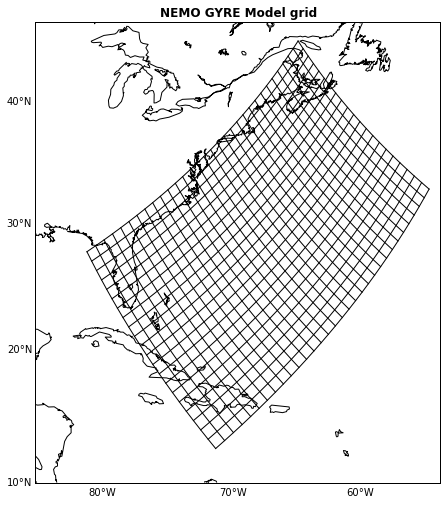

In [81]:
latlim=[10, 50]
lonlim=[-85, -45]
fig=plt.figure(figsize=(8, 8))
ax=fig.add_axes([0.1, 0.1, 0.8, 0.8])
proj=Basemap(projection='lcc',\
            lat_1=30, lat_2=60, lat_0=45, lon_0=-65,\
            llcrnrlon=lonlim[0], llcrnrlat=latlim[0],\
            urcrnrlon=lonlim[1], urcrnrlat=latlim[1],\
            resolution='l')
# draw coast line
proj.drawcoastlines(linewidth=1, color='k') #map.drawcountries, map.drawstates, map.fillcontinents
# draw parallels.
parallels = np.arange(0, 90, 10)
proj.drawparallels(parallels, labels=[1, 0, 0, 0], fontsize=10, linewidth=0)
# draw meridians
meridians = np.arange(180, 360, 10)
proj.drawmeridians(meridians, labels=[0, 0, 0, 1], fontsize=10, linewidth=0)
# transfer from Lat/Lon to projected grid
x, y=proj(longitude, latitude) 
proj.plot(x, y, color='k', linewidth=1)
proj.plot(x.T, y.T, color='k', linewidth=1)
ax.set_title('NEMO GYRE Model grid', fontsize=12, fontweight='bold')
plt.show()

# Plots on sea surface level

## Get surface data & mask data

In [82]:
# delete horizontal 4 edges 
#(the bottom will be deleted in section 4)
# =================================== #
# sst
sst=Nts.delete_edge(sst, [1, 1, 1, 1])
# vot
for i in range(np.size(vot, 0)):
    temp=vot[i, :, :]
    temp=Nts.delete_edge(temp, [1, 1, 1, 1])
    vot[i, :, :]=temp
# u
for i in range(np.size(u, 0)):
    temp=u[i, :, :]
    temp=Nts.delete_edge(temp, [1, 1, 2, 2])
    u[i, :, :]=temp
# v
for i in range(np.size(v, 0)):
    temp=v[i, :, :]
    temp=Nts.delete_edge(temp, [1, 1, 2, 2])
    v[i, :, :]=temp
# w
for i in range(np.size(w, 0)):
    temp=w[i, :, :]
    temp=Nts.delete_edge(temp, [1, 1, 2, 2])
    w[i, :, :]=temp
# =================================== #
# get valuable, and mask for surface plot
# sst
sst_ma=np.ma.masked_where(np.isnan(sst), sst)
# surface current
u_surface=u[0, :, :]
v_surface=v[0, :, :]
u_s_ma=np.ma.masked_where(np.isnan(u_surface), u_surface)
v_s_ma=np.ma.masked_where(np.isnan(v_surface), v_surface)
# 200m depth
u_200=u[11, :, :]
v_200=v[11, :, :]
u_200_ma=np.ma.masked_where(np.isnan(u_200), u_200)
v_200_ma=np.ma.masked_where(np.isnan(v_200), v_200)

## Sea Surface Temperature

The code below plots SST in Lambert projection

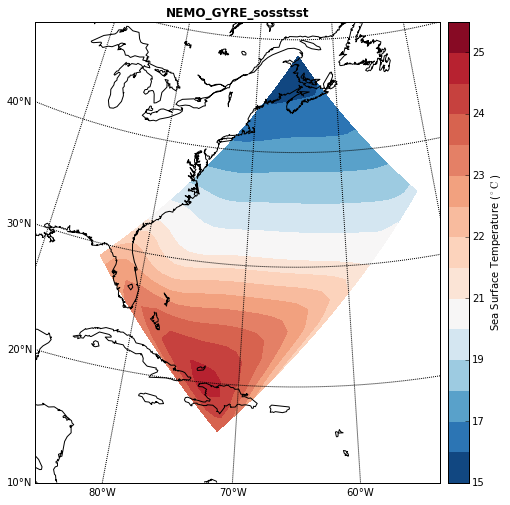

In [83]:
# Common
latlim=[10, 50]
lonlim=[-85, -45]
clevs=[15, 16, 17, 18, 19, 20, 21, 21.5, 22, 22.5, 23, 23.5, 24, 24.5, 25, 26] # degC
# Figure
fig=plt.figure(figsize=(8, 8))
ax=fig.add_axes([0.1, 0.1, 0.8, 0.8])
proj=Basemap(projection='lcc',\
            lat_1=30, lat_2=60, lat_0=45, lon_0=-65,\
            llcrnrlon=lonlim[0], llcrnrlat=latlim[0],\
            urcrnrlon=lonlim[1], urcrnrlat=latlim[1],\
            resolution='l')
# draw coast line
proj.drawcoastlines(linewidth=1, color='k') #map.drawcountries, map.drawstates, map.fillcontinents
# draw parallels.
parallels = np.arange(0, 90, 10)
proj.drawparallels(parallels, labels=[1, 0, 0, 0], fontsize=10)
# draw meridians
meridians = np.arange(180, 360, 10)
proj.drawmeridians(meridians, labels=[0, 0, 0, 1], fontsize=10)
# transfer from Lat/Lon to projected grid
x, y=proj(longitude, latitude) 
# filled contour
CS=proj.contourf(x, y, sst_ma, clevs, cmap=plt.cm.RdBu_r) # RdBu_r
#map.contour(x, y, sst_ma, clevs, colors=('k',), linewidth=1)
# colorbar
CBar=proj.colorbar(CS, location='right', size='5%', pad='2%')
# label & title
CBar.set_label('Sea Surface Temperature ($\mathrm{^\circ C}$ )', fontsize=10)
ax.set_title('NEMO_GYRE_sosstsst', fontsize=12, fontweight='bold')
plt.show()

## Ocean currents on sea surface level

The cell below plots sea surface currents.

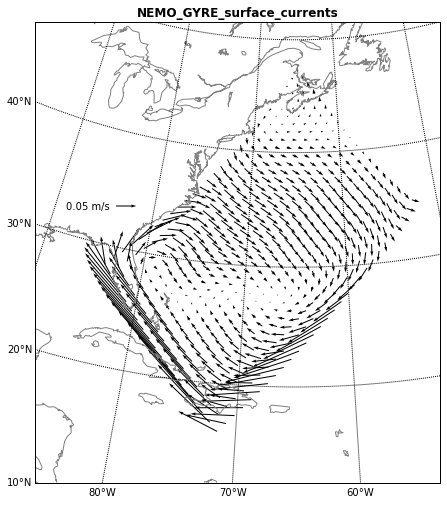

In [84]:
# Common
latlim=[10, 50]
lonlim=[-85, -45]
#speed=np.sqrt(u_s_ma*u_s_ma+v_s_ma*v_s_ma)
# Figure
fig=plt.figure(figsize=(8, 8))
ax=fig.add_axes([0.1, 0.1, 0.8, 0.8])
proj=Basemap(projection='lcc',\
            lat_1=30, lat_2=60, lat_0=45, lon_0=-65,\
            llcrnrlon=lonlim[0], llcrnrlat=latlim[0],\
            urcrnrlon=lonlim[1], urcrnrlat=latlim[1],\
            resolution='l')
# draw coast line
proj.drawcoastlines(linewidth=1, color=[0.5, 0.5, 0.5]) #map.drawcountries, map.drawstates, map.fillcontinents
# draw parallels.
parallels = np.arange(0, 90, 10)
proj.drawparallels(parallels, labels=[1, 0, 0, 0],fontsize=10)
# draw meridians
meridians = np.arange(180, 360, 10)
proj.drawmeridians(meridians, labels=[0, 0, 0, 1],fontsize=10)
# transform lat/lon to projection grid.
x, y=proj(longitude, latitude)
# streamline
Q=proj.quiver(x, y, u_s_ma, v_s_ma, width=0.0025, scale=1)
# make quiver key.
Qlabel=plt.quiverkey(Q, 0.2, 0.6, 0.05, '0.05 m/s', labelpos='W') # width, height, scale, label, position
#width=5*speed/speed.max() # '5' is the scale
#map.streamplot(x, y, u_s_ma, v_s_ma, density=0.6, color='k', linewidth=width)
# title
ax.set_title('NEMO_GYRE_surface_currents', fontsize=12, fontweight='bold')
plt.show()

## Ocean currents on 200m depth

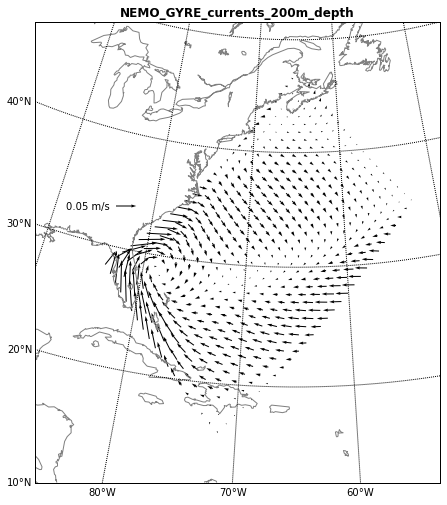

In [68]:
# Common
latlim=[10, 50]
lonlim=[-85, -45]
speed=np.sqrt(u_200_ma*u_200_ma+v_200_ma*v_200_ma)
# Figure
fig=plt.figure(figsize=(8, 8))
ax=fig.add_axes([0.1, 0.1, 0.8, 0.8])
proj=Basemap(projection='lcc',\
            lat_1=30, lat_2=60, lat_0=45, lon_0=-65,\
            llcrnrlon=lonlim[0], llcrnrlat=latlim[0],\
            urcrnrlon=lonlim[1], urcrnrlat=latlim[1],\
            resolution='l')
# draw coast line
proj.drawcoastlines(linewidth=1, color=[0.5, 0.5, 0.5]) #map.drawcountries, map.drawstates, map.fillcontinents
# draw parallels.
parallels = np.arange(0, 90, 10)
proj.drawparallels(parallels, labels=[1, 0, 0, 0], fontsize=10)
# draw meridians
meridians = np.arange(180, 360, 10)
proj.drawmeridians(meridians, labels=[0, 0, 0, 1],fontsize=10)
# transform vlat/lon to projection grid.
x, y=proj(longitude, latitude)
Q=proj.quiver(x, y, u_200_ma, v_200_ma, width=0.0025, scale=1)
# make quiver key.
Qlabel=plt.quiverkey(Q, 0.2, 0.6, 0.05, '0.05 m/s', labelpos='W')
# title
ax.set_title('NEMO_GYRE_currents_200m_depth', fontsize=12, fontweight='bold')
plt.show()

# Plot profiles

## Profile location

Here we creat our profile on [:, 4] grid, it crosses the center of the Gyre 

In [17]:
# Where we make the profile
lat_sec=latitude[:, 4]
lon_sec=longitude[:, 4]

Tips: The profile here are **not** purely zonal or meridional, it is changing in both directions. 

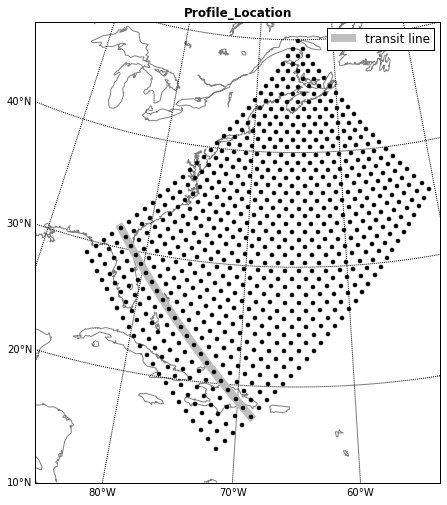

In [43]:
# Figure
fig=plt.figure(figsize=(8, 8))
ax=fig.add_axes([0.1, 0.1, 0.8, 0.8])
proj=Basemap(projection='lcc',\
            lat_1=30, lat_2=60, lat_0=45, lon_0=-65,\
            llcrnrlon=lonlim[0], llcrnrlat=latlim[0],\
            urcrnrlon=lonlim[1], urcrnrlat=latlim[1],\
            resolution='l')
# draw coast line
proj.drawcoastlines(linewidth=1, color=[0.5, 0.5, 0.5])
# draw parallels.
parallels = np.arange(0, 90, 10)
proj.drawparallels(parallels, labels=[1, 0, 0, 0],fontsize=10)
# draw meridians
meridians = np.arange(180, 360, 10)
proj.drawmeridians(meridians, labels=[0, 0, 0, 1],fontsize=10)
# transform vlat/lon to projection grid.
x, y=proj(longitude, latitude)
x_sec, y_sec=proj(lon_sec, lat_sec)
# plot sectionline, then data point
ax.plot(x_sec, y_sec, linewidth=8, color=[0.75, 0.75, 0.75], label='transit line')
ax.plot(x, y, color='k', linestyle='none', marker='o', markersize=4, linewidth=1)
ax.legend(fontsize=12)
ax.set_title('Profile_Location', fontsize=12, fontweight='bold')
plt.show()

## Get profile data & mask data

In [19]:
# Temperature profile
pro_t=vot[:, :, 4]
# check the size
print('Size of pro_t: {}'.format(pro_t.shape))
# Vertical circulation
pro_u=u[:, :, 4]
pro_v=v[:, :, 4]
pro_w=w[:, :, 4]
# check the size
print('Size of pro_u: {}\nSize of pro_v: {}\nSize of pro_w: {}'.format(pro_u.shape, pro_v.shape, pro_w.shape))
# Lat/Lon Grid
x, z=np.meshgrid(lat_sec, depth)
print('Size of x (in latitude): {}'.format(x.shape))
print('Size of z (in depth): {}'.format(z.shape))

Size of pro_t: (31L, 22L)
Size of pro_u: (31L, 22L)
Size of pro_v: (31L, 22L)
Size of pro_w: (31L, 22L)
Size of x (in latitude): (31L, 22L)
Size of z (in depth): (31L, 22L)


We need to delete the bottom edge of profile data for a similar reason as <a href='#Define-function-"Delete-edge"-to-get-rid-off-bad-value'>section 2.C</a> tells

In [20]:
# Delete the bottom edge 
pro_t=Nts.delete_edge(pro_t, [0, 0, 0, 1])
pro_t_ma=np.ma.masked_where(np.isnan(pro_t), pro_t)
pro_u=Nts.delete_edge(pro_u, [0, 0, 0, 1])
pro_u_ma=np.ma.masked_where(np.isnan(pro_u), pro_u)
pro_v=Nts.delete_edge(pro_v, [0, 0, 0, 1])
pro_v_ma=np.ma.masked_where(np.isnan(pro_v), pro_v)
pro_w=Nts.delete_edge(pro_w, [0, 0, 0, 1])
pro_w_ma=np.ma.masked_where(np.isnan(pro_w), pro_w)

See the range of profile data 

In [21]:
print('Latitude range: {} ~ {}'.format(lat_sec[0], lat_sec[-1]))
print('Depth range: {} ~ {}'.format(depth[0], depth[-1]))

Latitude range: 17.5411987305 ~ 31.696187973
Depth range: 4.97526550293 ~ 4451.25927734


## Temperature profile

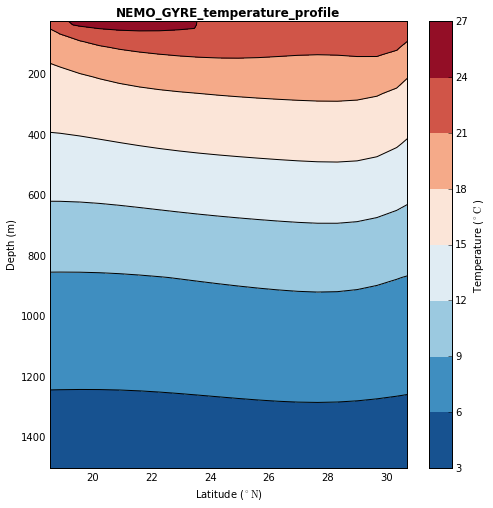

In [22]:
# Common
clevs=[3, 6, 9, 12, 15, 18, 21, 24, 27]
# Figure
fig=plt.figure(figsize=(8, 8))
ax=plt.gca()
ax.set_xlim(lat_sec[0]+1, lat_sec[-1]-1)
ax.set_ylim(depth[0]+20, 1500)
ax.invert_yaxis()
ax.xaxis.set_tick_params(size=0)
ax.yaxis.set_tick_params(size=0)
ax.set_xlabel('Latitude ($\mathrm{^\circ N}$)')
ax.set_ylabel('Depth (m)')
#CS=plt.contourf(x, z, pro_u_ma)
CS=plt.contourf(x, z, pro_t_ma, clevs, cmap=plt.cm.RdBu_r)
plt.contour(x, z, pro_t, clevs, colors = ('k',), linewidth=1)
CBar=plt.colorbar(CS)
# label & title
CBar.set_label('Temperature ($\mathrm{^\circ C}$ )', fontsize=10)
ax.set_title('NEMO_GYRE_temperature_profile', fontsize=12, fontweight='bold')
plt.show()

## Vertical circulation

An interesting thing in the cell below is Python's `contour` automatically set the `linestyles` of positive value as `'-'` and negative value as `'--'`

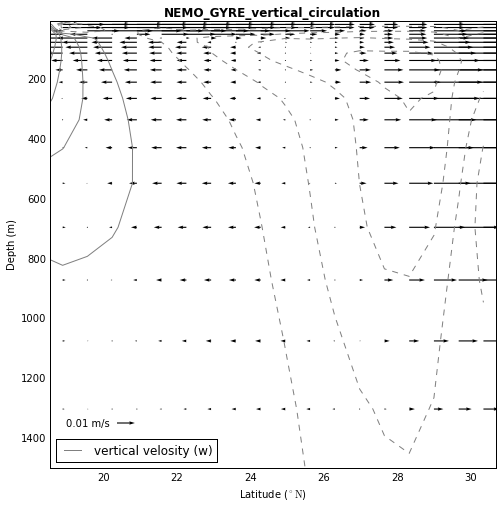

In [38]:
# Common
clevs=np.array([-4, -3, -2, -1, 1, 2, 3, 4])*1e-6
# Figure
fig=plt.figure(figsize=(8, 8))
ax=plt.gca()
ax.set_xlim(lat_sec[0]+1, lat_sec[-1]-1)
ax.set_ylim(depth[0], 1500)
ax.invert_yaxis()
ax.xaxis.set_tick_params(size=0)
ax.yaxis.set_tick_params(size=0)
ax.set_xlabel('Latitude ($\mathrm{^\circ N}$)')
ax.set_ylabel('Depth (m)')
# contour w
CS=plt.contour(x, z, pro_w_ma, clevs, colors = ([0.5, 0.5, 0.5],), linewidth=1.5)
# label the contour
labels = ['vertical velosity (w)']
CS.collections[-1].set_label(labels[0])
# Quiver
Q=plt.quiver(x, z, pro_v_ma, pro_w_ma, width=0.0025, scale=0.25, color='k')
# make quiver key.
Qlabel=plt.quiverkey(Q, 0.15, 0.1, 0.01, '0.01 m/s', labelpos='W')
# legend
plt.legend(loc='lower left', fontsize=12)
ax.set_title('NEMO_GYRE_vertical_circulation', fontsize=12, fontweight='bold')
plt.show()

# *Some useful things about "ticks"

```python
ax=plt.gca()
ax.set_xlim()
ax.set_ylim()
ax.invert_yaxis()
ax.yaxis.tick_left()
ax.yaxis.set_tick_params(size=0)
plt.setp(ax.get_yticklabels(), visible=False)
plt.tick_params(\
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off
```